In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('sales_data_sample.csv',encoding='unicode_escape')   # most IMP ************************************
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [ ]:
df = df.drop(columns=['ORDERNUMBER','ORDERLINENUMBER','STATUS','DEALSIZE','ADDRESSLINE1','ADDRESSLINE2', 'CITY', 'STATE','CUSTOMERNAME', 'POSTALCODE', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME','PHONE','PRODUCTLINE','PRODUCTCODE','COUNTRY','TERRITORY'])
df

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
0,30,95.70,2871.00,2/24/2003 0:00,1,2,2003,95
1,34,81.35,2765.90,5/7/2003 0:00,2,5,2003,95
2,41,94.74,3884.34,7/1/2003 0:00,3,7,2003,95
3,45,83.26,3746.70,8/25/2003 0:00,3,8,2003,95
4,49,100.00,5205.27,10/10/2003 0:00,4,10,2003,95
...,...,...,...,...,...,...,...,...
2818,20,100.00,2244.40,12/2/2004 0:00,4,12,2004,54
2819,29,100.00,3978.51,1/31/2005 0:00,1,1,2005,54
2820,43,100.00,5417.57,3/1/2005 0:00,1,3,2005,54
2821,34,62.24,2116.16,3/28/2005 0:00,1,3,2005,54


In [ ]:
df['ORDERDATE'] = pd.to_numeric(pd.to_datetime(df['ORDERDATE']))
df

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
0,30,95.70,2871.00,1046044800000000000,1,2,2003,95
1,34,81.35,2765.90,1052265600000000000,2,5,2003,95
2,41,94.74,3884.34,1057017600000000000,3,7,2003,95
3,45,83.26,3746.70,1061769600000000000,3,8,2003,95
4,49,100.00,5205.27,1065744000000000000,4,10,2003,95
...,...,...,...,...,...,...,...,...
2818,20,100.00,2244.40,1101945600000000000,4,12,2004,54
2819,29,100.00,3978.51,1107129600000000000,1,1,2005,54
2820,43,100.00,5417.57,1109635200000000000,1,3,2005,54
2821,34,62.24,2116.16,1111968000000000000,1,3,2005,54


In [ ]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [ ]:
# Step 3: Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

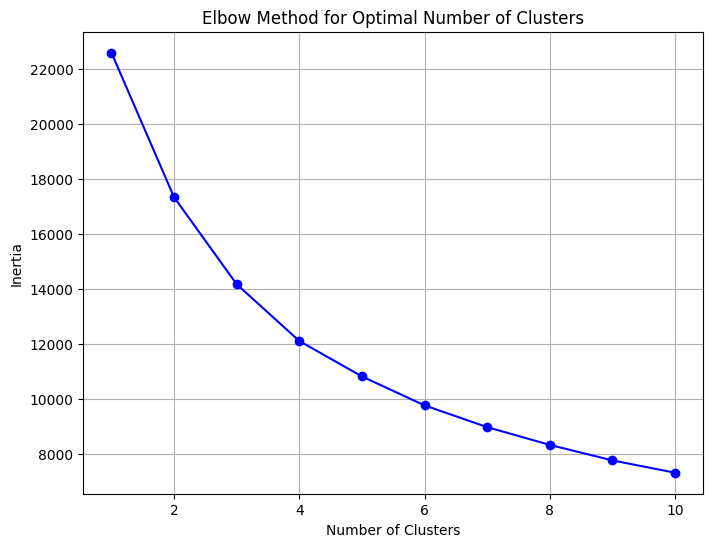

In [ ]:
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [ ]:
# Step 5: Perform K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_counts = df['Cluster'].value_counts()    

# The fit_predict() method not only fits the KMeans model to the data but also assigns each data point to a cluster. 
# The resulting cluster labels are stored in a new column named 'Cluster' within the DataFrame df

# Print the number of data points in each cluster
print("Number of data points in each cluster:")
print(cluster_counts)

Number of data points in each cluster:
1    1168
2     897
0     758
Name: Cluster, dtype: int64
